# Data Project - Stock Market Analysis

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

In this project, we explore financial data from the stock market, particularly technology stocks. Financial data is an example of time series data, which is one of the most prevalent data types characterized by a series of data points indexed in time order. We will get the stock data from the Yahoo finance website, which is a rich resource for financial market data. By analyzing these data, we aim to answer the following questions:

    1.) What was the average change in prices of the stock over time?
    2.) What was the correlation between different stocks?
    3.) How much value do we put at risk by investing in a particular stock?
    4.) How can we predict the future stock behavior? (For example, predicting the closing price stock price of APPLE inc.)

# 1. Getting the Data

In this section, we load the required packages and download the financial data.  We will get our stock data from the Yahoo Finance website, which is a rich resource of financial market data and tools to assist investment. We are using the python package [yfinance library](https://aroussi.com/post/python-yahoo-finance) to obtain the market data from Yahoo.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-07,153.699997,154.029999,151.130005,151.600006,150.795120,56182000,APPLE
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.058365,47204800,APPLE
2023-03-09,153.559998,154.539993,150.229996,150.589996,149.790466,53833600,APPLE
2023-03-10,150.210007,150.940002,147.610001,148.500000,147.711578,68572400,APPLE
2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671112,84457100,APPLE
2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779831,73695900,APPLE
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177734,77167900,APPLE
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022537,76161100,APPLE
2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177048,98944600,APPLE


Here, we have consolidated all the datasets into a single dataframe named 'df' which comprises 8 columns. The data covers a one-year period. The 'open' column records the opening price of a stock, while the 'close' column stores the closing price. The 'high' and 'low' columns represent the highest and lowest prices of the stock within a day. Additionally, the 'volume' column denotes the number of stocks that change ownership in a day.

In [4]:
# General info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2023-03-07 to 2024-03-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1012 non-null   float64
 1   High          1012 non-null   float64
 2   Low           1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Adj Close     1012 non-null   float64
 5   Volume        1012 non-null   int64  
 6   company_name  1012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.2+ KB


We see that there are no missing value in the data, and the data types are in the correct format.

## Data visualization

The closing price, which is the final price at which a stock is exchanged during the typical trading day, serves as the standard measure employed by investors for monitoring its performance across time.

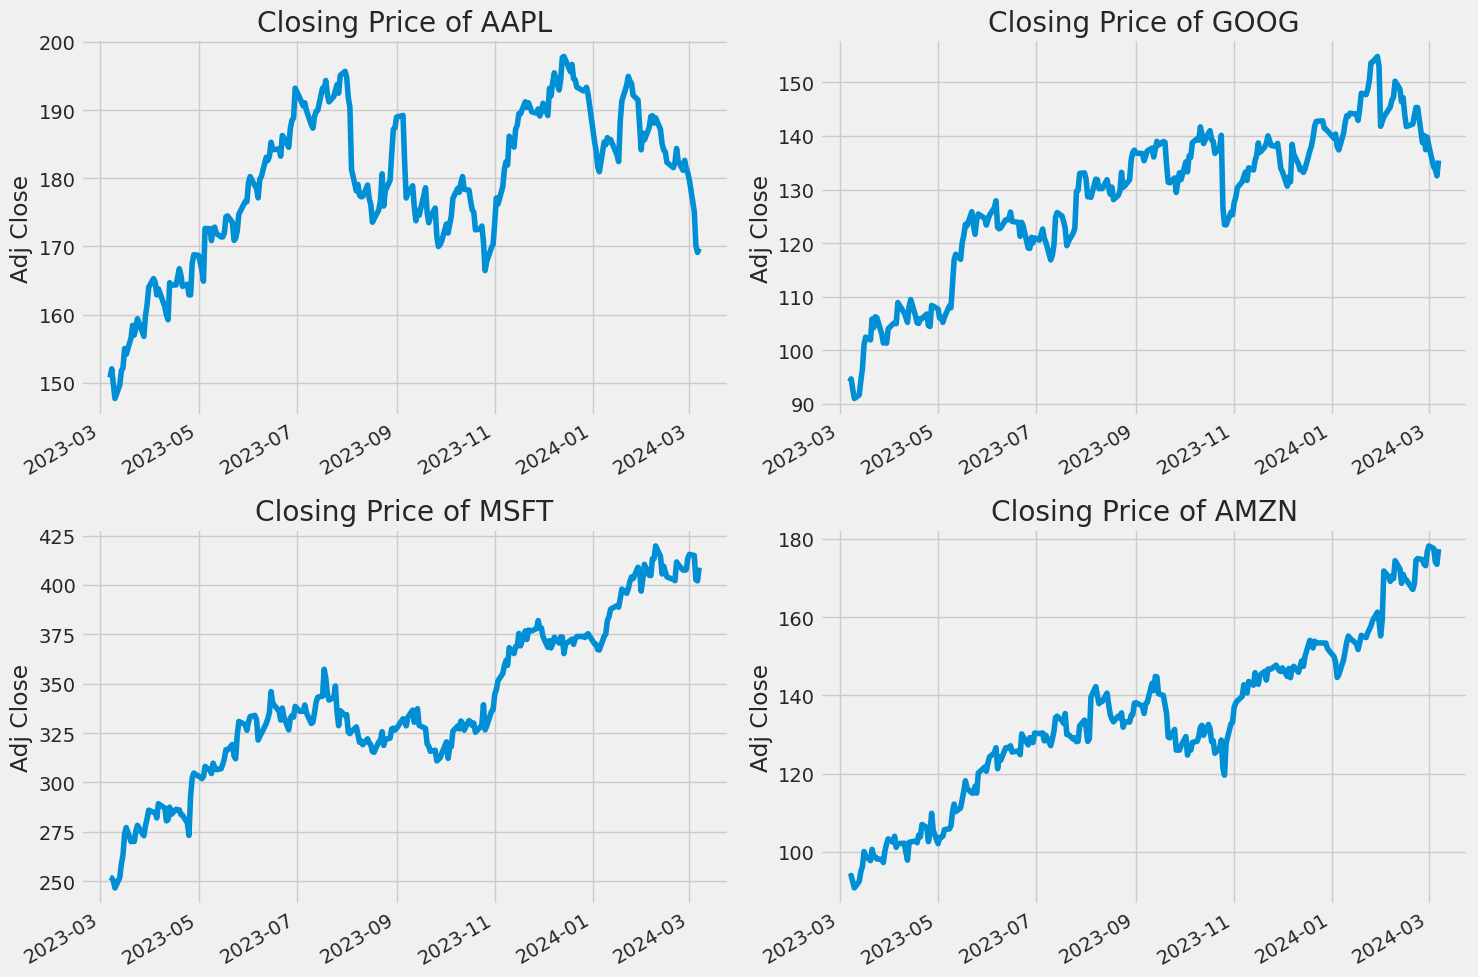

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Volume refers to the quantity of an asset or security that is exchanged within a specific timeframe, typically during a day. For example, stock trading volume indicates the number of shares of a security traded between its daily opening and closing prices. Both trading volume and its variations over time are crucial factors for technical traders.

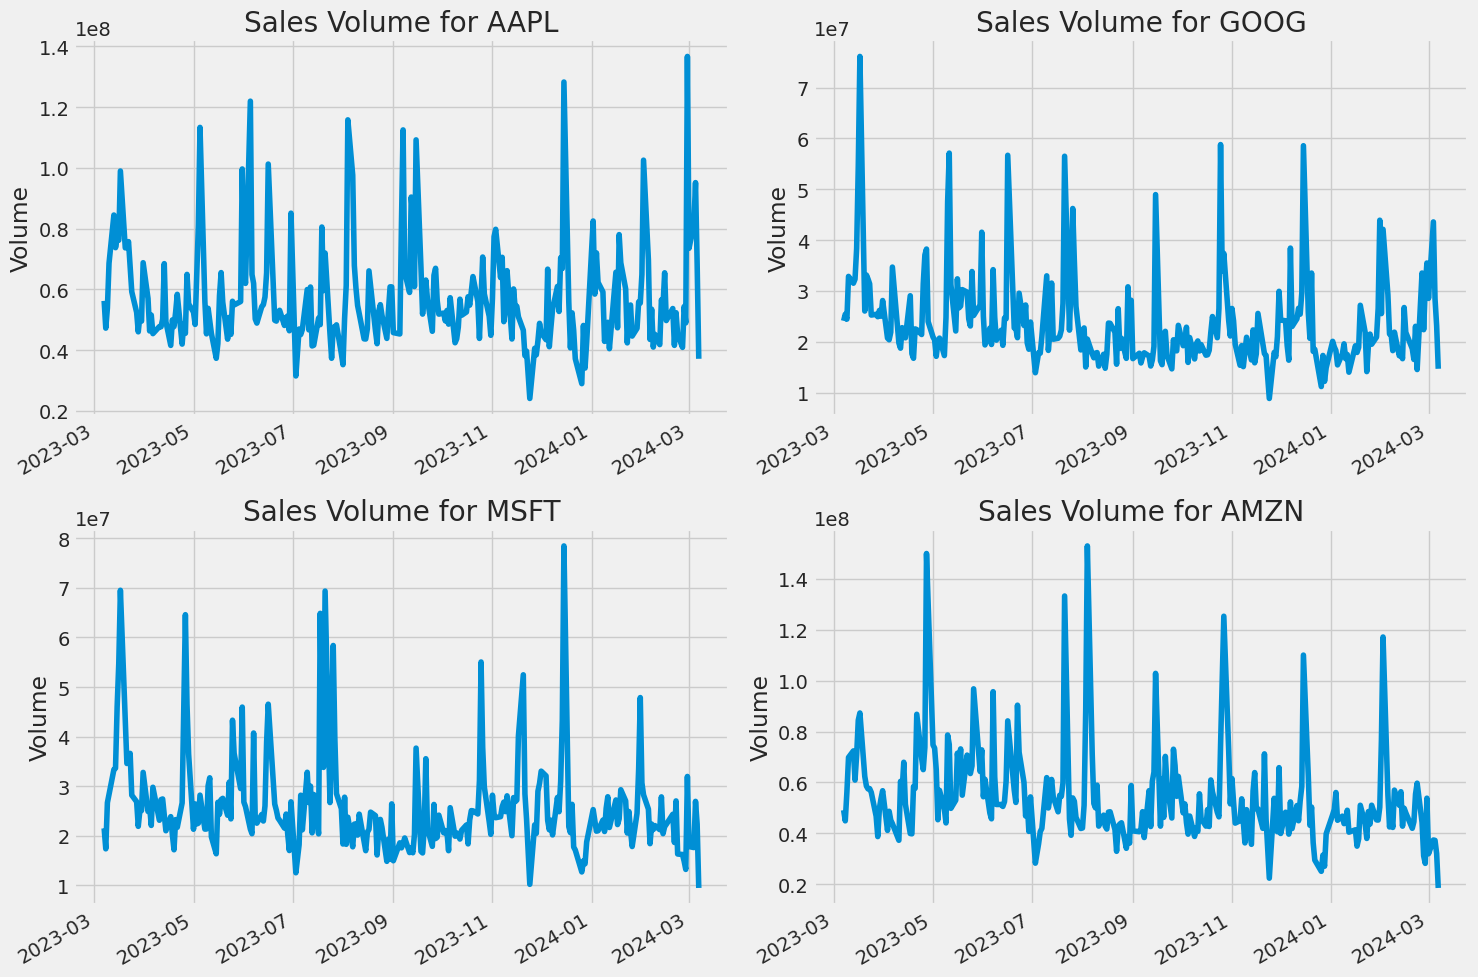

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock. The moving average (MA) is the average prices computed over a designated time frame.

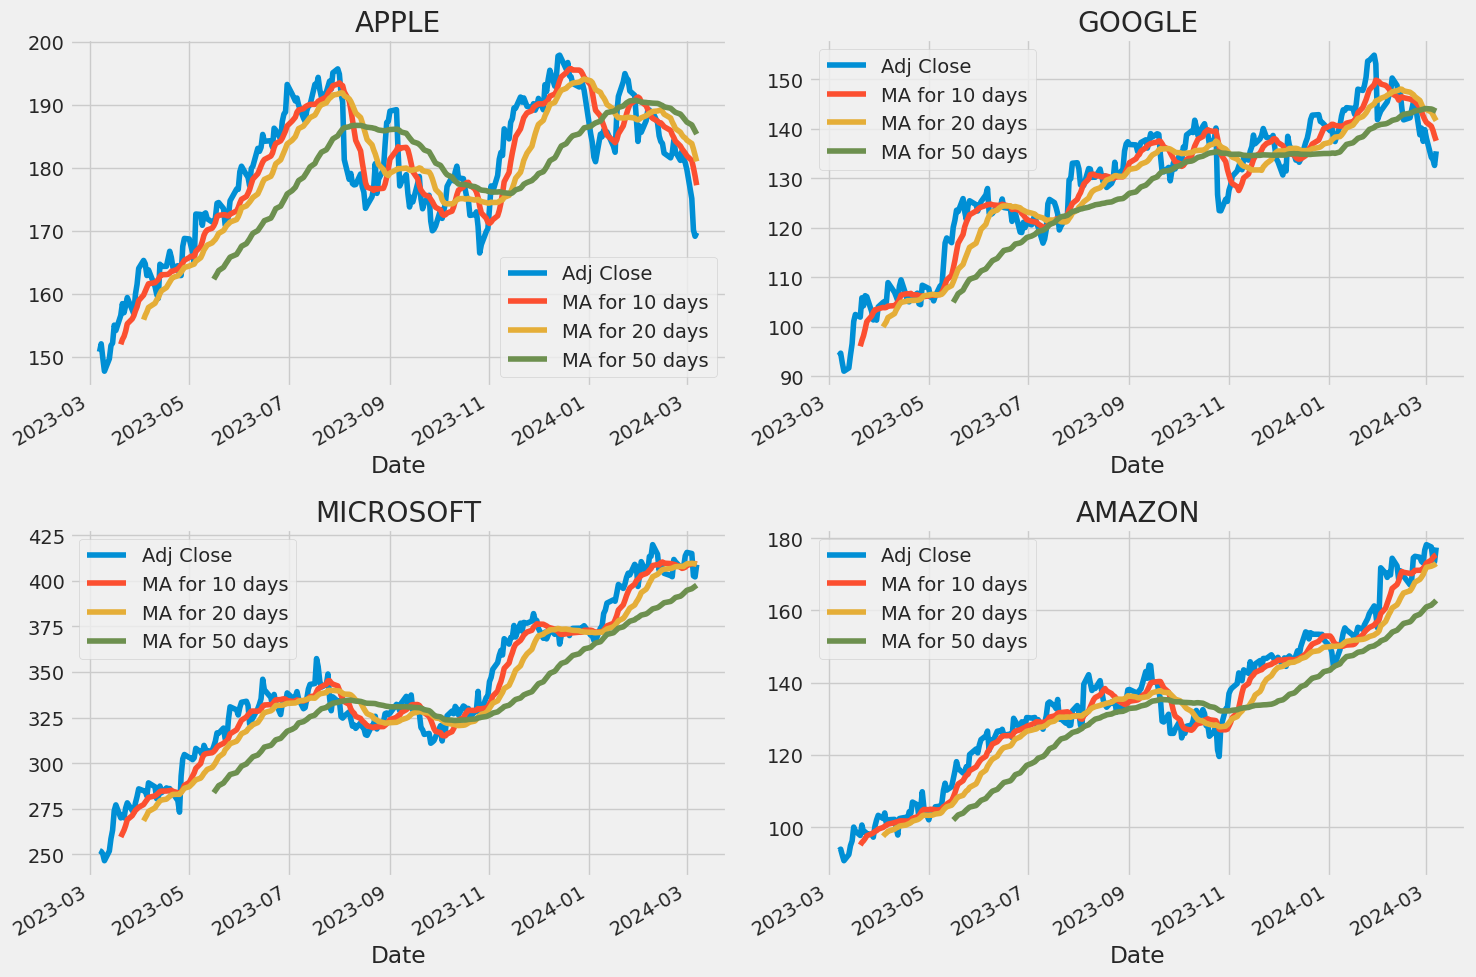

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 2. What was the daily return of the stock on average?

We're now going to analyze the risk of the stock. In order to do so we'll need
to take a closer look at the daily percentage changes in price of the stock. We visualize the average daily return using a histogram.

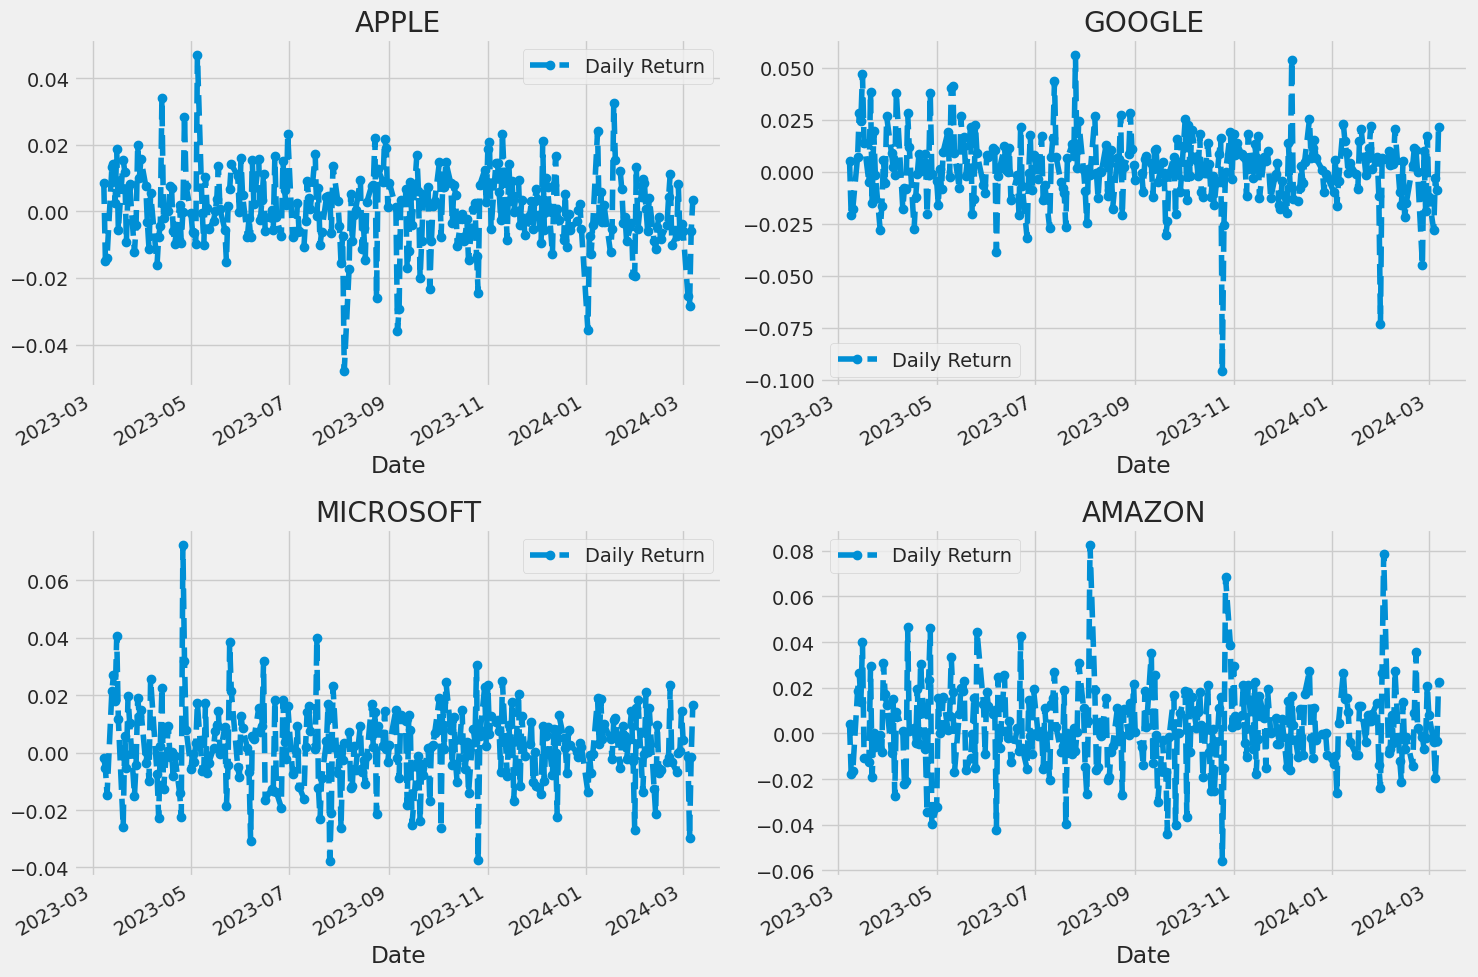

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree at how correlated are two variables which has a value that is between -1.0 and +1.0. Correlation measures association, but doesn’t show the causation effect - it could be that x causes y or vice versa, or if the association is caused by a third factor.

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-07,NaN,NaN,NaN,NaN
2023-03-08,0.008377,0.003955,0.005097,-0.001771
2023-03-09,-0.014914,-0.017781,-0.021025,-0.005439
2023-03-10,-0.013879,-0.016477,-0.017807,-0.014783
2023-03-13,0.013266,0.018737,0.007142,0.021441


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a comparison between the Microsoft and Google stocks.



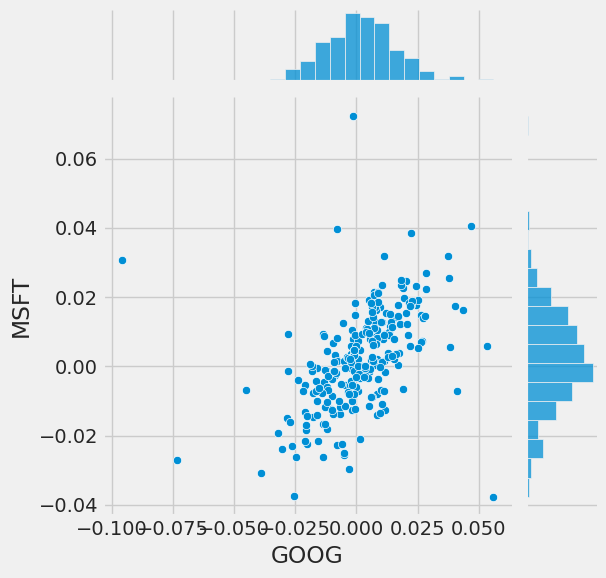

In [10]:
#  Compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can observe that the daily returns of Google are positively correlated with the daily returns of Microsoft. We will now replicate this comparison analysis for every possible combination of stocks and plot all the comparisons on a single graph.

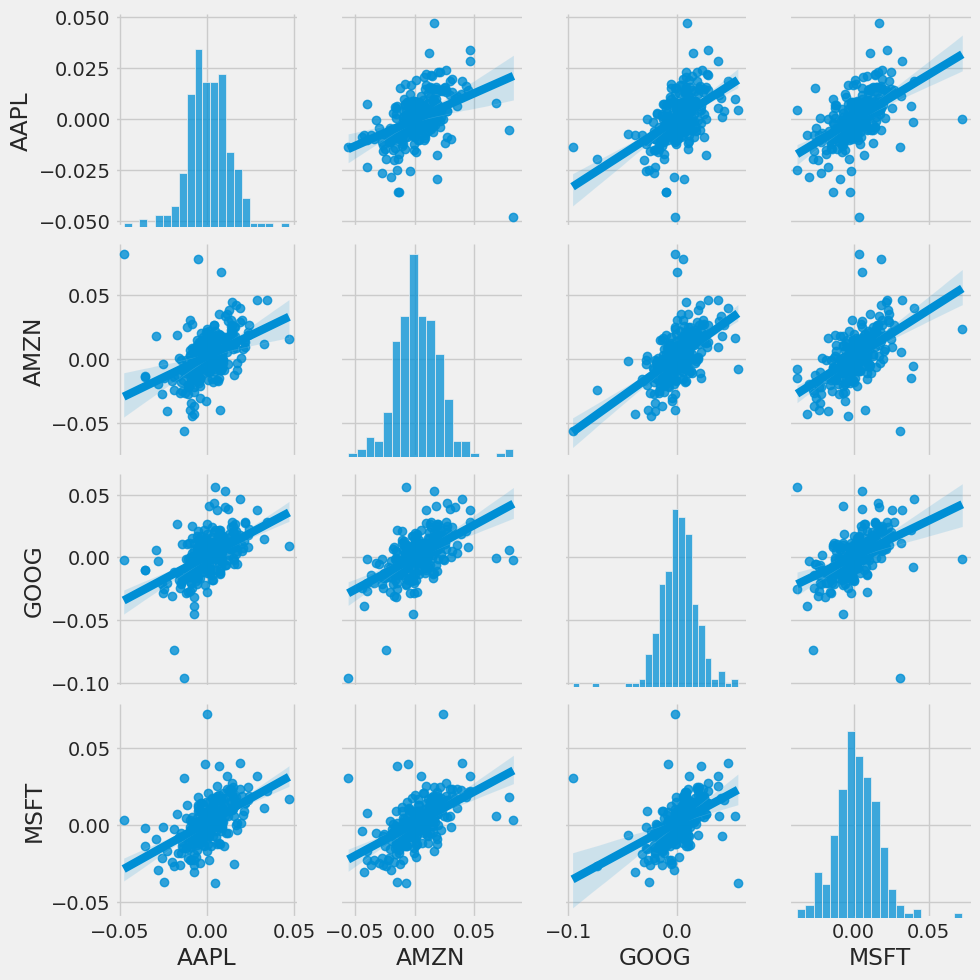

In [11]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows a positive correlation between each pair of stocks.

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.


Text(0.5, 1.0, 'Correlation of stock closing price')

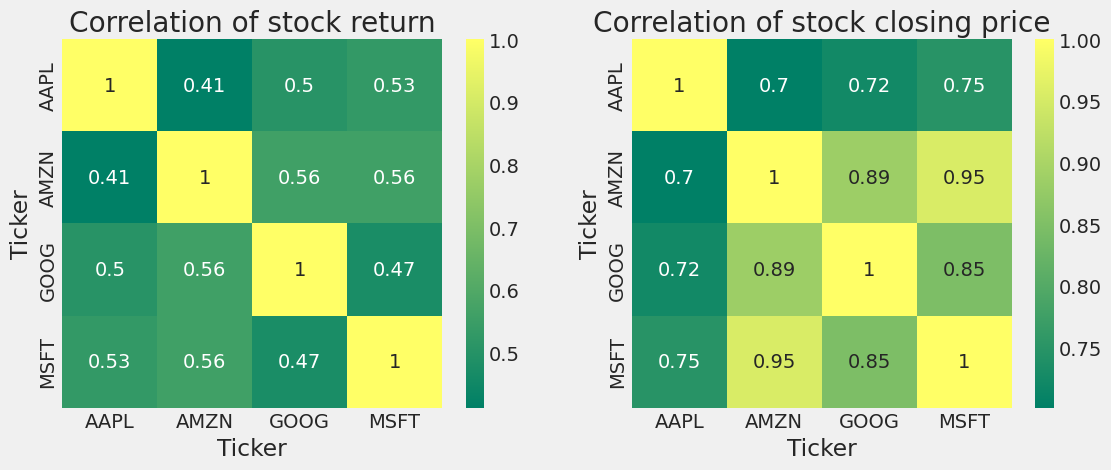

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

We see here numerically and visually that Amazon and Microsoft or Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

# 4. How much risk by investing in a particular stock?

There are various methods to [measure risk](https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp). One fundamental approach is through the standard deviation of daily returns, which measures the spread of data from its mean. Essentially, a stock with a higher standard deviation signifies greater investment risk, as the returns are more likely to deviate from the average. Here, we plot the average daily returns alongside the standard deviation of daily returns.

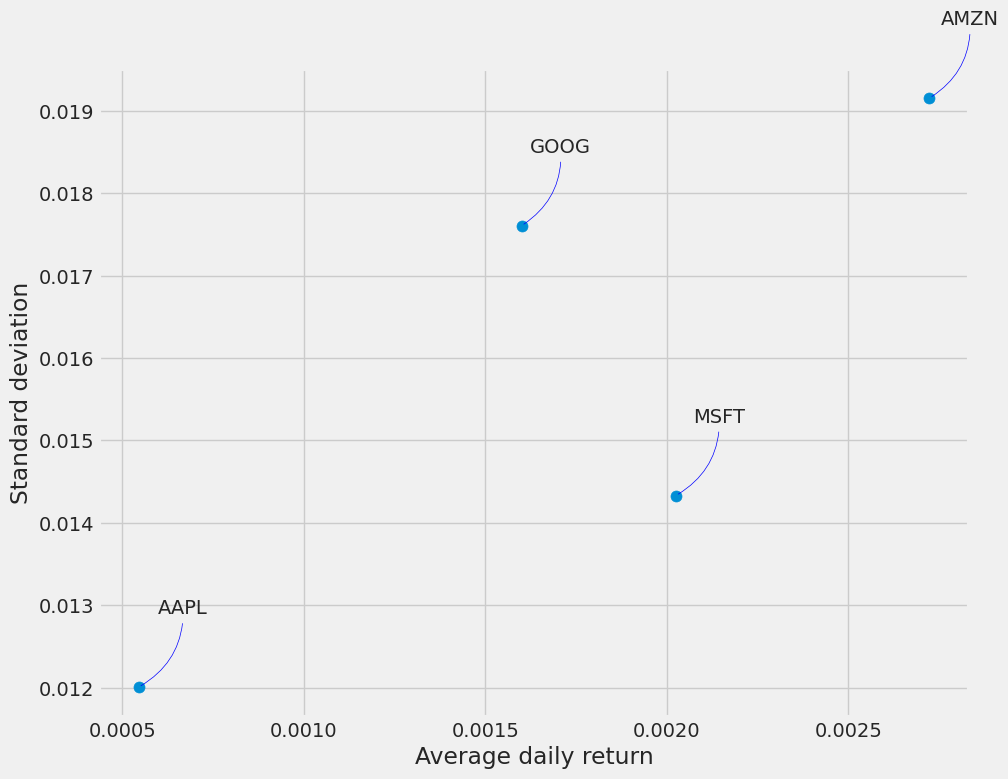

In [13]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Average daily return')
plt.ylabel('Standard deviation')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

We can see that Amazon stock has the highest risk, followed by Google, Microsoft, and Apple. Nevertheless, it is important to acknowledge that stocks with higher risk also tend to have higher average daily returns. One possible way of deciding which stock to invest is by looking at the ratio of average return and standard deviation. One can decide to invest the stock with the larger ratio.

In [14]:
rets.mean()/ rets.std()

Ticker
AAPL    0.045349
AMZN    0.142175
GOOG    0.090854
MSFT    0.141274
dtype: float64

# 5. Predicting the closing stock price of APPLE inc:

Here, our objective is to forecast future stock prices using deep learning techniques. Deep learning methods are typically data-intensive and challenging to interpret. However, they are currently the most widely utilized and accurate methods for prediction tasks. Initially, we gather the closing stock prices of Apple Inc. over the past decade.


In [15]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2013-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.747723,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.536327,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.075714,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.981149,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.024164,458707200
...,...,...,...,...,...,...
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400


In [16]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on, using 90% of the data as a training set
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len

2533

In [17]:
# The first step of training the data is scaling the data to have mean 0 and variance 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0307376 ],
       [0.02939368],
       [0.02646537],
       ...,
       [0.84801463],
       [0.84258464],
       [0.84692865]])

In [205]:
# Create the training data set and the test data set
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[int(training_data_len):len(scaled_data), :]
original_test_data = dataset[int(training_data_len):len(scaled_data), :]

## Autoregresive model
We first build a autoregression model, which is a standard model in time-series analysis. Mathematically, for every value $y_t$ we want to predict, we use the last L value as predictors:

$$ y_t =
\beta_0 + \beta_1 y_{t - 1} +
\ldots + \beta_L y_{t - L}  
$$
For every time steps $t$. The cofficients can be obtained using least squared estimation. Here, we use the last ten values for prediction (L = 10).

In [206]:
from statsmodels.tsa.ar_model import AutoReg

auto_reg = AutoReg(train_data, lags=10)
AutoReg_fit = auto_reg.fit()
predictions = AutoReg_fit.predict(start=len(train_data), end=len(scaled_data)-1, dynamic=False)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model

mse = np.mean((dataset[training_data_len: , :] - predictions) ** 2)
print('Mean Squared Error:', mse)

Mean Squared Error: 952.2638242222448


<ipython-input-143-ede314f91477>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


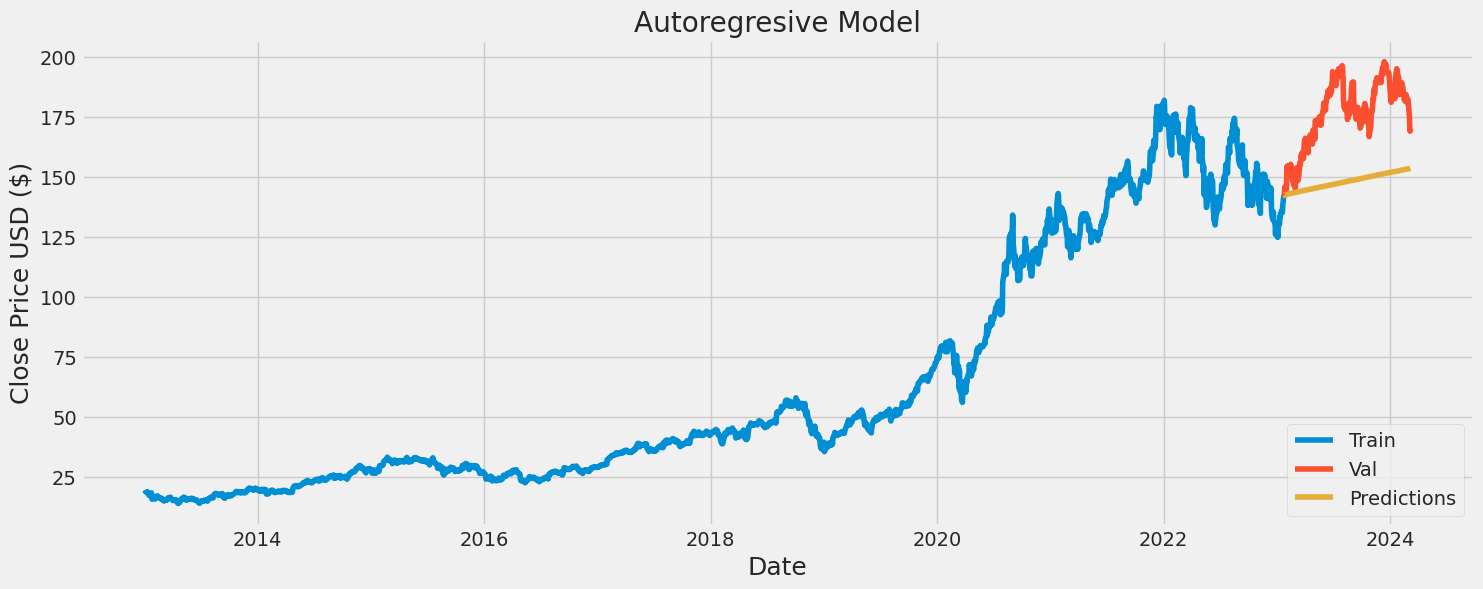

In [143]:
#plot the prediction result
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Autoregresive Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

The autoregressive model fit a linear model, which is not really a good prediction based on the graph. In the next section, we will try to improve the prediction using deep learning methods.

## Deep learning methods
In the recent years, deep learning methods have made substantial progress in areas such as imagine processing. These methods are often resource-intensity nad hard to interpret. Nevertheless, it is most useful for the task for prediction. We will apply several of the methods to compare the performance with each other.

Let us try to build the full neural network model with 4 layers in total. To do this, we first prepare the data by spliting the training data into a chunk of length L: $(y_t, y_{t-1},
\ldots, y_{t - L})$ for every time step $t$. The first value is the label and the rest are used for training.

In [207]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
# Using the past 10 days to predict the next day's value
L = 10

for i in range(L, len(train_data)):
    x_train.append(train_data[i-L:i, 0]) #Each row of x_train is the predictors for each time step t
    y_train.append(train_data[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [253]:
#Building and training the model
#Import the library from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize the neural network model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=128, input_shape= (x_train.shape[1], 1)))

# Add additional hidden layers
model.add(Dense(units=64))
model.add(Dense(units=32))

# Add the output layer
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2523/2523 [==============================] - 15s 5ms/step - loss: 0.0012


In [272]:
# Create the testing data set
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(L, len(test_data)):
    x_test.append(test_data[i-L:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
NN_predictions = model.predict(x_test)
NN_predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
mse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Mean Squared Error:', mse)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_5' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_5' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


<ipython-input-265-f32630afc420>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = NN_predictions


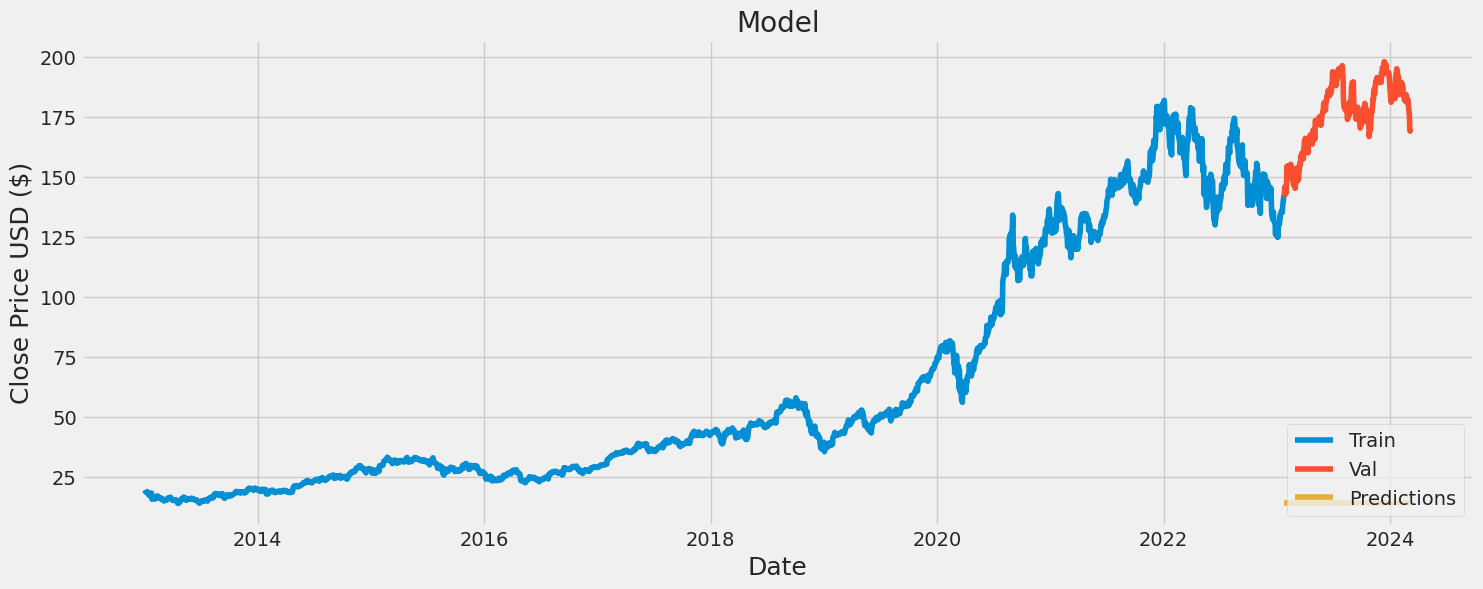

In [265]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = NN_predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Next, we build the prediction model using the [Long short-term memory (LSTM) network] (https://colah.github.io/posts/2015-08-Understanding-LSTMs/), which is a special type of reccurent neural network capable of capturing long-term dependence.

In [266]:
from keras.layers import LSTM

# Build the LSTM model with 4 layers: the first two layers are LSTM structure and the last two are dense layers
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2523/2523 [==============================] - 77s 29ms/step - loss: 0.0016


In [267]:
#Obtain the prediction and calculate the mean square error
RNN_predictions = model.predict(test_data)
RNN_predictions = scaler.inverse_transform(RNN_predictions)

# Get the root mean squared error (RMSE)
mse = np.mean((RNN_predictions - original_data) ** 2)
print('Mean Squared Error:', mse)

9/9 [==============================] - 3s 240ms/step
Mean Squared Error: 13402.685683835487


<ipython-input-250-cbcc51fea143>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = RNN_predictions


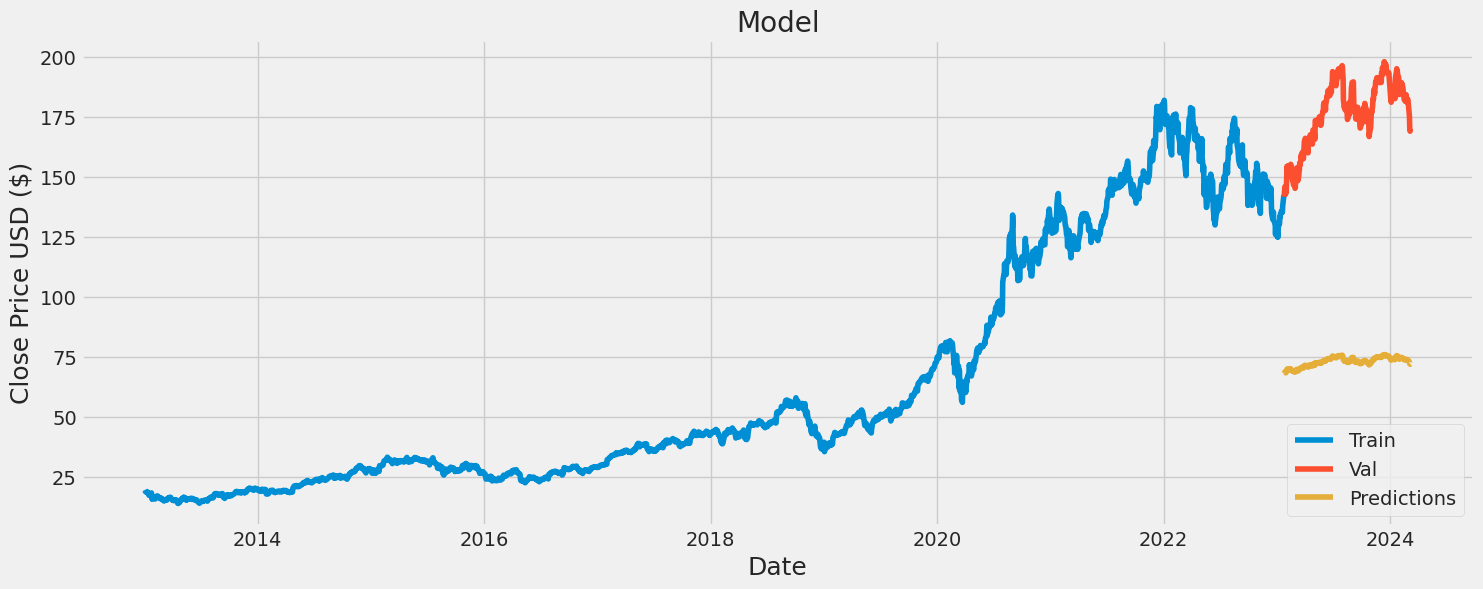

In [250]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = RNN_predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()